# <center>Implementation of Supervised Learning on Red Wine Dataset</center>

<b>Topic</b>
Implementation of Supervised Learning on Red Wine Dataset

Mohammad Hanif Aulia Rahman      - 1301213258

## **Background**
In this report, our goal is to predict the quality of the wine based on several wine story attributes. our project uses a dataset of red wine, comprising 1,599 instances, with several attributes including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, pH, sulfates, alcohol, and quality

Our group has employed the Support Vector Machine (SVM) with regression method. To support the SVM model, our group will be using three different models applied to the regression model, each model will use a different Hyperparameter and mathematical function. In model1 we employ 5 as the degree of optimization with rbf as the mathematical function, model2 has 5 with polynomial, model3 has 20 with linear



## **Dataset Exploration**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from IPython.display import display

In [ ]:
# Import Dataset
df = pd.read_csv('winequality-red.csv', sep=';', quotechar='"')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## **Data Preprocessing and Exploration**
Removing Outliers - we employ a method called IQR(Interquartile Range) to handle outliers in the dataset

Correlation Analysis - Create graph to determine the correlation of variables to eachother

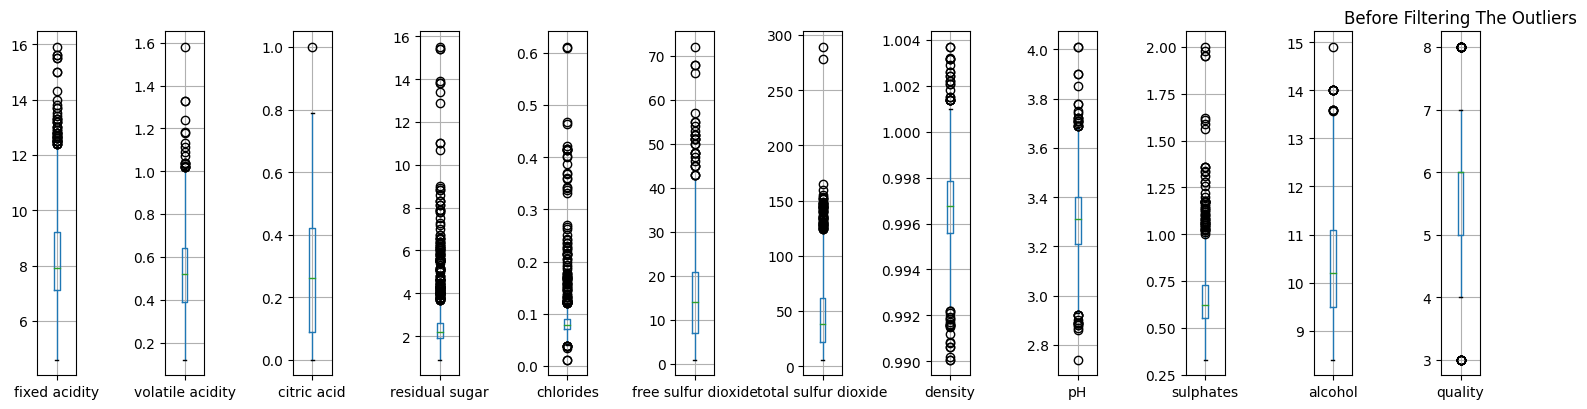

In [ ]:
# Before filtering outliers
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 4))

for i, column in enumerate(df.columns):
    df[[column]].boxplot(ax=axes[i])

plt.tight_layout()
plt.title("Before Filtering The Outliers")
plt.show()

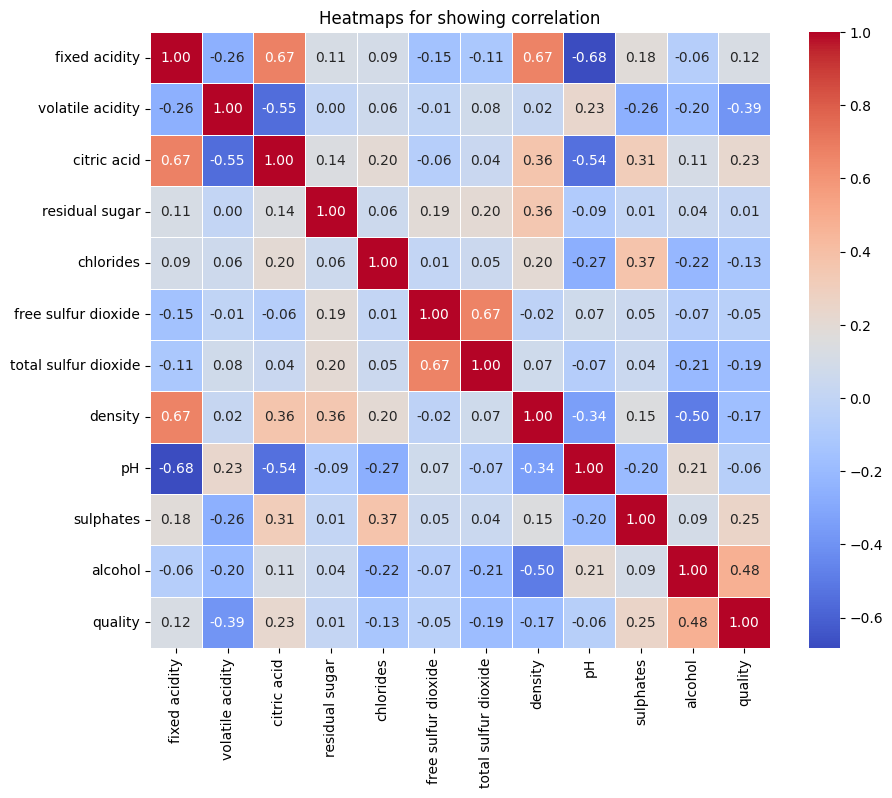

In [ ]:
# Heatmap to show any correlation of wine ingredients to the quality
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Create a block plot (heatmap) for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmaps for showing correlation")
plt.show()

In [ ]:
# Filter the outliers
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Function to filter outliers using IQR method
def filter_outliers_iqr(data, columns):
    filtered_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.80 * IQR
        upper_bound = Q3 + 0.80 * IQR
        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]
    return filtered_data

filtered_df = filter_outliers_iqr(df, selected_columns)


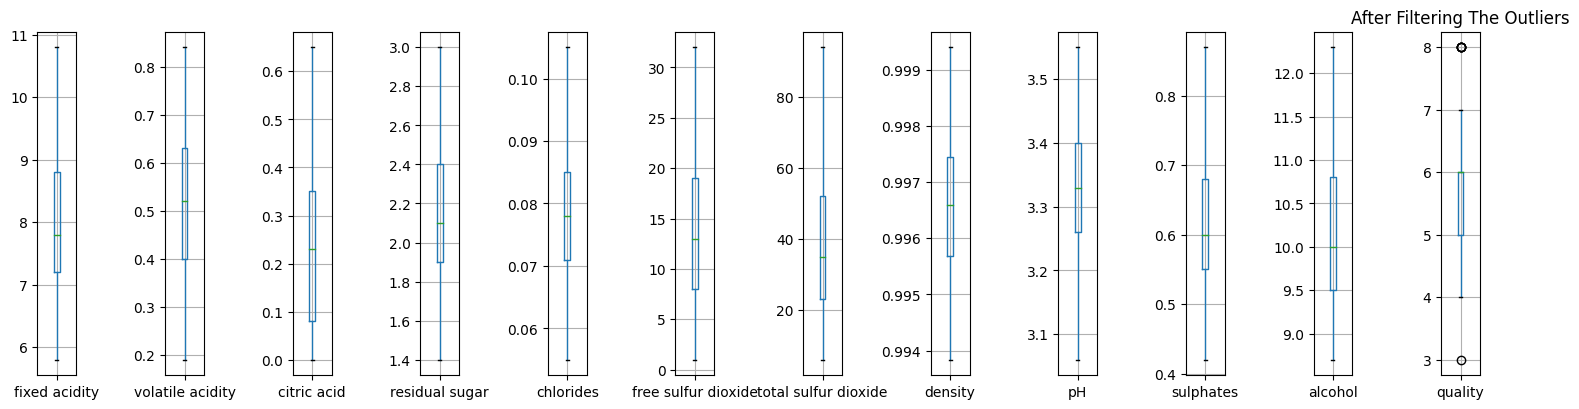

In [ ]:
# After filtering outlier
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 4))

for i, column in enumerate(df.columns):
    filtered_df[[column]].boxplot(ax=axes[i])

plt.tight_layout()
plt.title("After Filtering The Outliers")
plt.show()

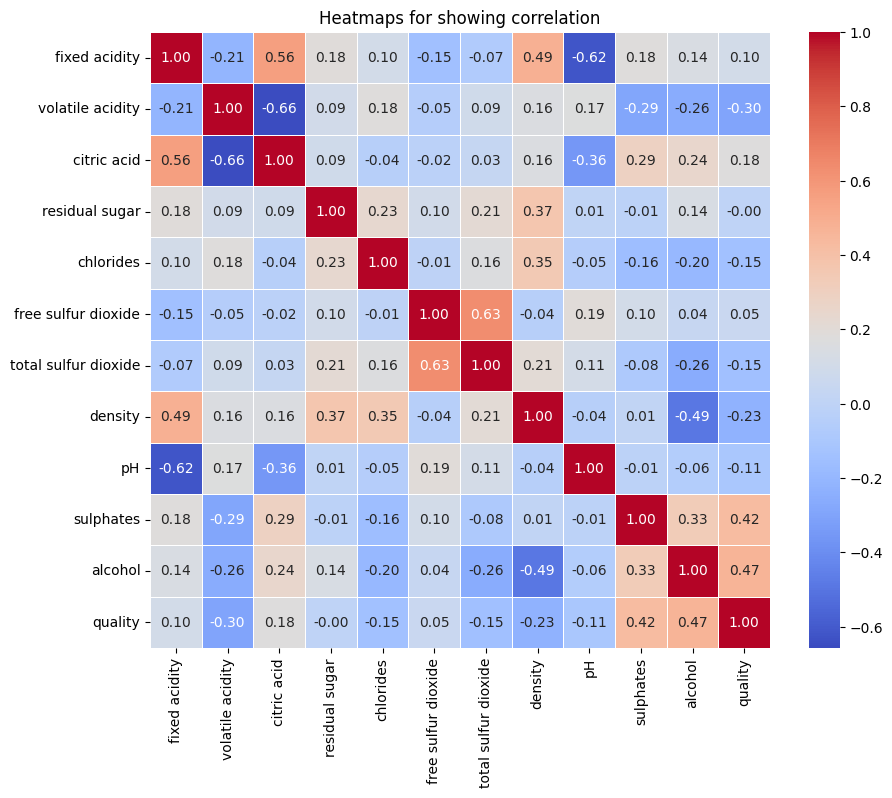

In [ ]:
# Heatmap to show any correlation of wine ingredients to the quality
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Calculate the correlation matrix for the selected columns
correlation_matrix = filtered_df[selected_columns].corr()

# Create a block plot (heatmap) for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmaps for showing correlation")
plt.show()

In [ ]:
# Exploration Data Analysis
# Write your code here
correlation = filtered_df.corr()['alcohol']
print(correlation)

fixed acidity           0.143529
volatile acidity       -0.258268
citric acid             0.242990
residual sugar          0.136788
chlorides              -0.197508
free sulfur dioxide     0.037409
total sulfur dioxide   -0.256773
density                -0.489300
pH                     -0.061574
sulphates               0.327924
alcohol                 1.000000
quality                 0.468499
Name: alcohol, dtype: float64


In [ ]:
filtered_df = filtered_df.drop(['free sulfur dioxide'], axis = 1)


##**Data Splitting**

In [ ]:
# Model Building (at least 3 scheme)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = filtered_df.drop(columns=['alcohol'])
y = filtered_df['alcohol']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((575, 10), (144, 10), (575,), (144,))

###**Model 1**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the SVR model
svm_model = SVR()

# Define the second SVM model with a linear kernel and different parameters from the best model
svm_model_1 = SVR(C=5, epsilon=0.01, kernel='rbf')

# Train the second SVM model
svm_model_1.fit(X_train, y_train)

# Predictions on the test set for the second SVM model
svm_predictions_1 = svm_model_1.predict(X_test)

# Evaluate the second SVM model
svm_mae_1 = mean_absolute_error(y_test, svm_predictions_1)
svm_mse_1 = mean_squared_error(y_test, svm_predictions_1)
svm_r2_1 = r2_score(y_test, svm_predictions_1)

# Output the evaluation metrics for the second SVM model
svm_mae_1, svm_mse_1, svm_r2_1


(0.27593990423860004, 0.1599081277612385, 0.7386357594983541)

###**Model 2**

In [ ]:
# Define the second SVM model with a linear kernel and different parameters from the best model
svm_model_2 = SVR(C=10, epsilon=0.01, kernel='poly')

# Train the second SVM model
svm_model_2.fit(X_train, y_train)

# Predictions on the test set for the second SVM model
svm_predictions_2 = svm_model_2.predict(X_test)

# Evaluate the second SVM model
svm_mae_2 = mean_absolute_error(y_test, svm_predictions_2)
svm_mse_2 = mean_squared_error(y_test, svm_predictions_2)
svm_r2_2 = r2_score(y_test, svm_predictions_2)

# Output the evaluation metrics for the second SVM model
svm_mae_2, svm_mse_2, svm_r2_2


(0.5047672899790573, 0.5032743187898211, 0.17741573279573197)

###**Model 3**

In [ ]:
# Define the second SVM model with a linear kernel and different parameters from the best model
svm_model_3 = SVR(C=20, epsilon=0.01, kernel='linear')

# Train the second SVM model
svm_model_3.fit(X_train, y_train)

# Predictions on the test set for the second SVM model
svm_predictions_3 = svm_model_3.predict(X_test)

# Evaluate the second SVM model
svm_mae_3 = mean_absolute_error(y_test, svm_predictions_3)
svm_mse_3 = mean_squared_error(y_test, svm_predictions_3)
svm_r2_3 = r2_score(y_test, svm_predictions_3)

# Output the evaluation metrics for the second SVM model
svm_mae_3, svm_mse_3, svm_r2_3


(0.364983999758424, 0.22058098799054948, 0.6394680920701306)

## **Evaluation Model**

In [ ]:
print("SVM (Model_1) Mean Absolute Error:", svm_mae_1)
print("SVM (Model_1) Mean Squared Error:", svm_mse_1)
print("SVM (Model_1) R^2 Score:", svm_r2_1)

print("\nSVM (Model_2) Mean Absolute Error:", svm_mae_2)
print("SVM (Model_2) Mean Squared Error:", svm_mse_2)
print("SVM (Model_2) R^2 Score:", svm_r2_2)

print("\nSVM (Model_3) Mean Absolute Error:", svm_mae_3)
print("SVM (Model_3) Mean Squared Error:", svm_mse_3)
print("SVM (Model_3) R^2 Score:", svm_r2_3)


SVM (Model_1) Mean Absolute Error: 0.27593990423860004
SVM (Model_1) Mean Squared Error: 0.1599081277612385
SVM (Model_1) R^2 Score: 0.7386357594983541

SVM (Model_2) Mean Absolute Error: 0.5047672899790573
SVM (Model_2) Mean Squared Error: 0.5032743187898211
SVM (Model_2) R^2 Score: 0.17741573279573197

SVM (Model_3) Mean Absolute Error: 0.364983999758424
SVM (Model_3) Mean Squared Error: 0.22058098799054948
SVM (Model_3) R^2 Score: 0.6394680920701306


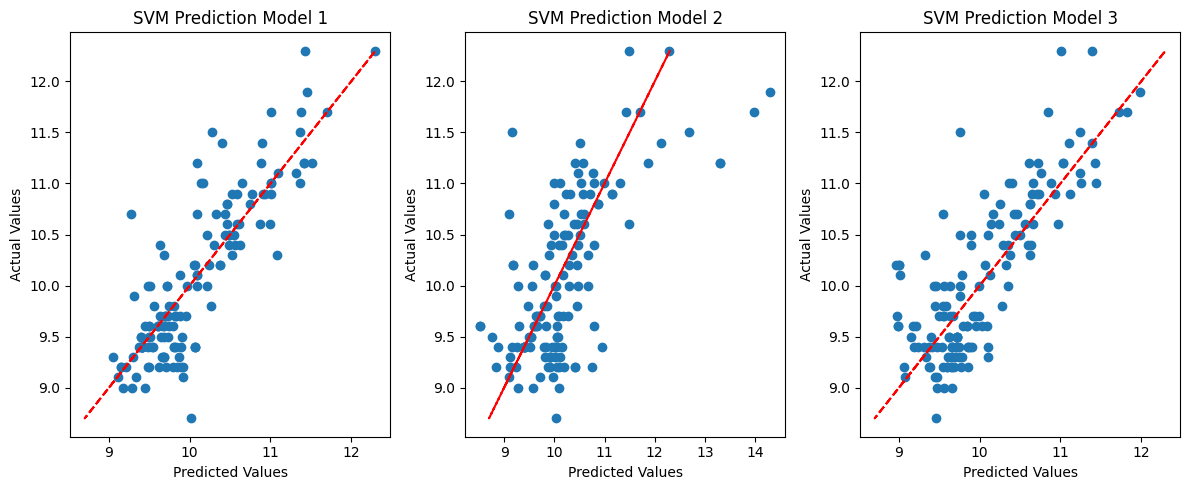

In [ ]:
# Prediction vs Actual plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(svm_predictions_1, y_test)
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Prediction Model 1')

plt.subplot(1, 3, 2)
plt.scatter(svm_predictions_2, y_test)
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Prediction Model 2')

plt.subplot(1, 3, 3)
plt.scatter(svm_predictions_3, y_test)
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Prediction Model 3')

plt.tight_layout()
plt.show()


## ***Result & Analysis***
Model 1 has the highest accuracy of predicting the alcohol content in wine, with only 0.276 mean absolute error off the actual target value and with only 0.160 average squared difference that deviates from the actual value. The model also able to predict alcohol based on other variables correctly 74% of the time.

Model 2 is less accurate in predicting the alcohol content in wine, with 0.504 mean absolute error off from the actual values. It also deviate more from the actual value than model 1 with 0.503 average squared difference. also The model able to predict alcohol based on other variables correctly 18% of the time.

Model 3 is generally better than Model 2 but not as good as model 1, Its prediction are 0.365 mean absolute error away from the actual value, and the prediction are deviating 0.221 average squared difference from the actual value. and the model is correct at its prediction 64% of the time